In [3]:
library(readr)

In [5]:
wine <- read_csv("wineR3_4.csv")

Rows: 178 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Class
dbl (4): Flavanoids, Hue, OD, Proline

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
wine$Class <- as.factor(wine$Class)

In [23]:
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [24]:
library(e1071)

In [25]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’




In [26]:
library(GGally)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [27]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [28]:
library(ggplot2)

In [29]:
str(wine)

spc_tbl_ [178 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Flavanoids: num [1:178] 3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Hue       : num [1:178] 1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ OD        : num [1:178] 3.92 3.4 3.17 3.45 2.93 2.85 3.58 3.58 2.85 3.55 ...
 $ Proline   : num [1:178] 1065 1050 1185 1480 735 ...
 $ Class     : Factor w/ 3 levels "Low","Middle",..: 3 3 3 3 3 3 3 3 3 3 ...
 - attr(*, "spec")=
  .. cols(
  ..   Flavanoids = col_double(),
  ..   Hue = col_double(),
  ..   OD = col_double(),
  ..   Proline = col_double(),
  ..   Class = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


In [30]:
head(wine,5)

Flavanoids,Hue,OD,Proline,Class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.06,1.04,3.92,1065,Premium
2.76,1.05,3.40,1050,Premium
3.24,1.03,3.17,1185,Premium
3.49,0.86,3.45,1480,Premium
2.69,1.04,2.93,735,Premium


In [31]:
svm_model <- svm(Class ~ ., data= wine, type = "C-classification", kernel="radial")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


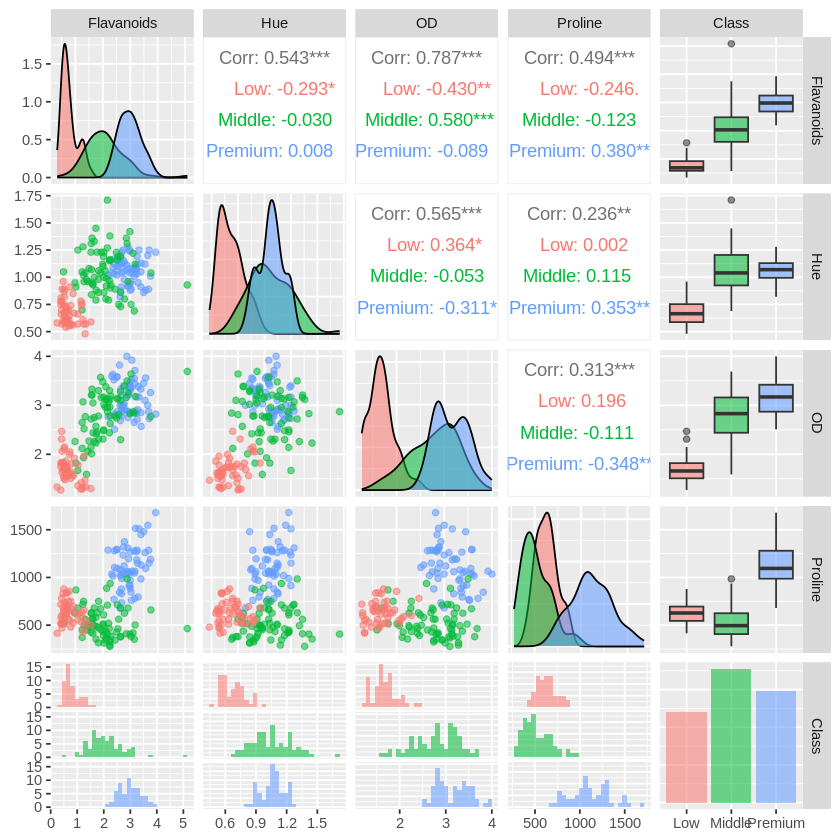

In [32]:
ggpairs(wine, ggplot2::aes(colour= Class, alpha = 0.4))

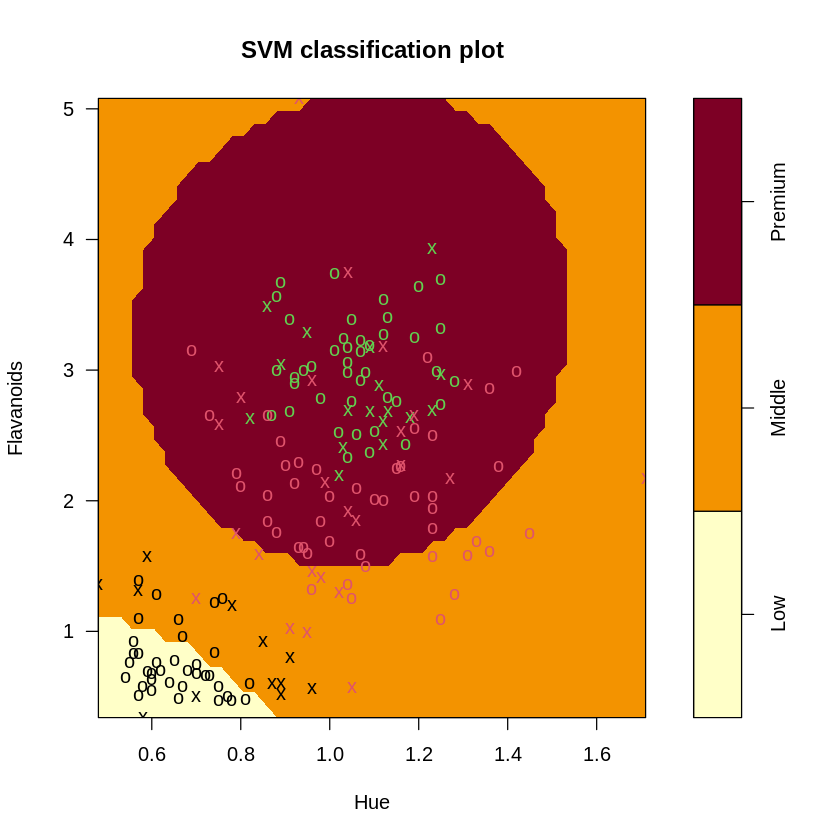

In [33]:
plot(svm_model, data=wine, Flavanoids~Hue, slice = list(OD=3, Proline=1000))

In [34]:
pred = predict(svm_model,wine)
tab = table(Predicted=pred, Actual = wine$Class)
tab

         Actual
Predicted Low Middle Premium
  Low      48      2       0
  Middle    0     65       2
  Premium   0      4      57

In [35]:
1-sum(diag(tab)/sum(tab))

[1] 0.04494382

In [36]:
sum(diag(tab)/sum(tab))

[1] 0.9550562

In [37]:
svm_model <- svm(Class ~ ., data=wine, type = "C-classification",
kernel="linear")

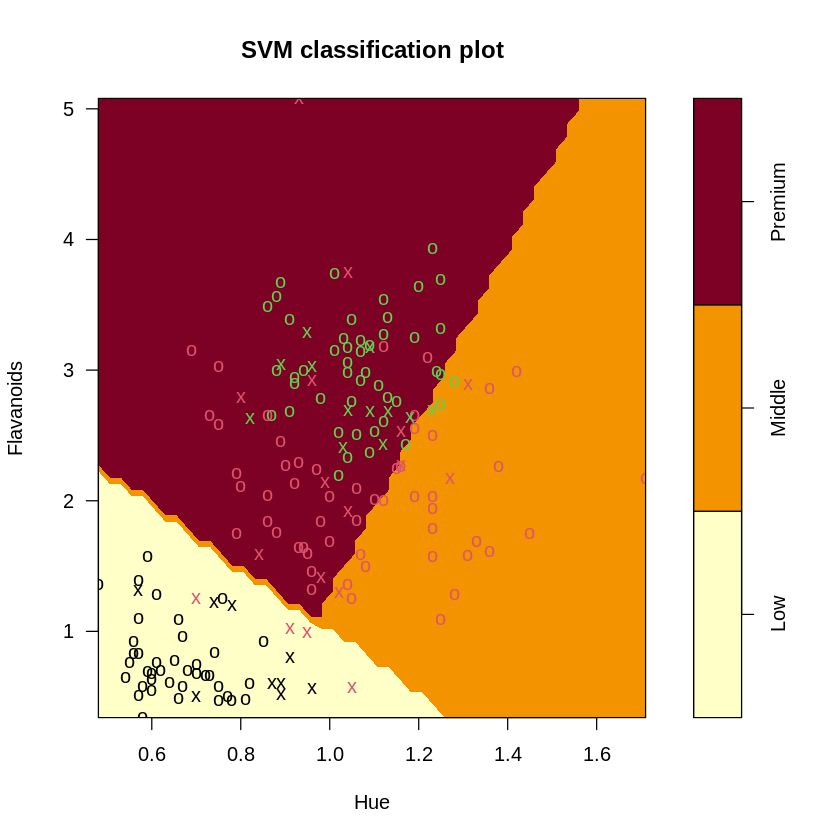

In [38]:
plot(svm_model, data=wine, Flavanoids~Hue, slice = list(OD=2, Proline=1000))

In [39]:
pred = predict(svm_model,wine)
tab = table(Predicted=pred, Actual = wine$Class)
tab

         Actual
Predicted Low Middle Premium
  Low      48      3       0
  Middle    0     65       2
  Premium   0      3      57

In [40]:
1-sum(diag(tab)/sum(tab))

[1] 0.04494382

In [41]:
sum(diag(tab)/sum(tab))

[1] 0.9550562

In [42]:
svm_model <- svm(Class ~ ., data=wine, type = "C-classification",kernel="poly")

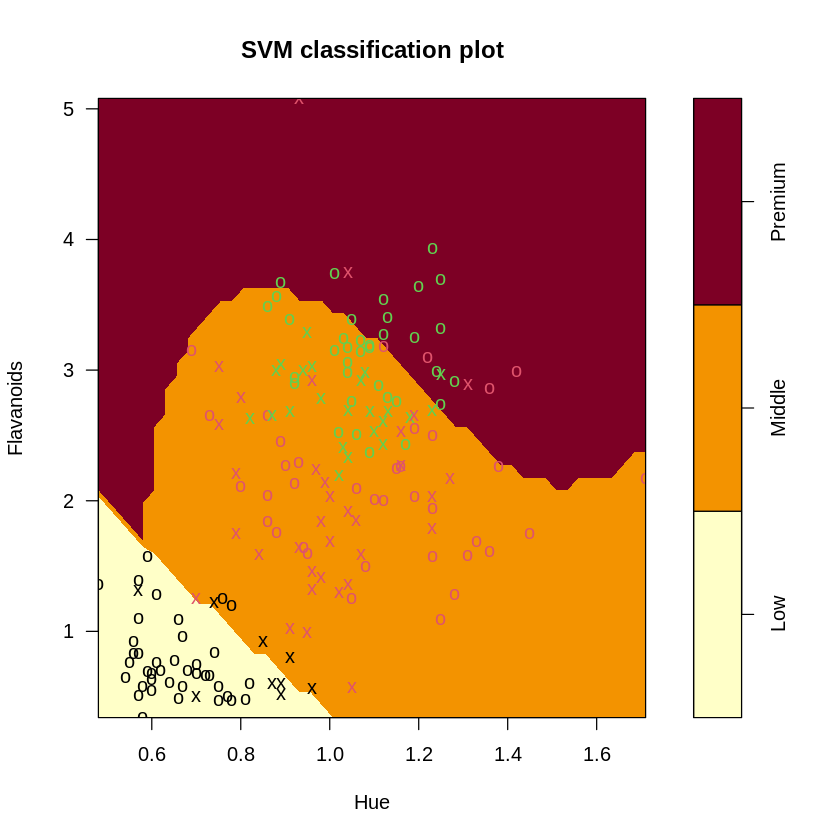

In [43]:
plot(svm_model, data=wine, Flavanoids~Hue, slice = list(OD=2, Proline=1000))

In [44]:
pred = predict(svm_model,wine)
tab = table(Predicted=pred, Actual = wine$Class)
tab

         Actual
Predicted Low Middle Premium
  Low      47      0       0
  Middle    1     70       5
  Premium   0      1      54

In [45]:
1-sum(diag(tab)/sum(tab))

[1] 0.03932584

In [46]:
sum(diag(tab)/sum(tab))

[1] 0.9606742

In [47]:
svm_model <- svm(Class ~ ., data=wine, type = "C-classification",kernel="sigmoid")

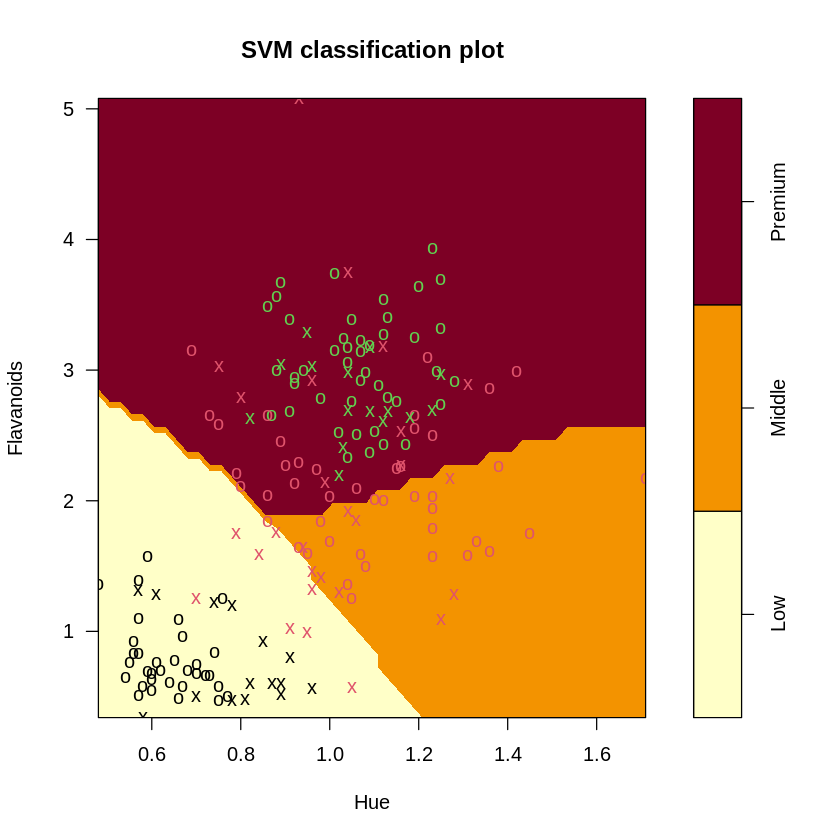

In [48]:
plot(svm_model, data=wine, Flavanoids~Hue, slice = list(OD=2, Proline=1000))

In [49]:
pred = predict(svm_model,wine)
tab = table(Predicted=pred, Actual = wine$Class)
tab

         Actual
Predicted Low Middle Premium
  Low      48      6       0
  Middle    0     60       2
  Premium   0      5      57

In [50]:
1-sum(diag(tab)/sum(tab))

[1] 0.07303371

In [51]:
sum(diag(tab)/sum(tab))

[1] 0.9269663

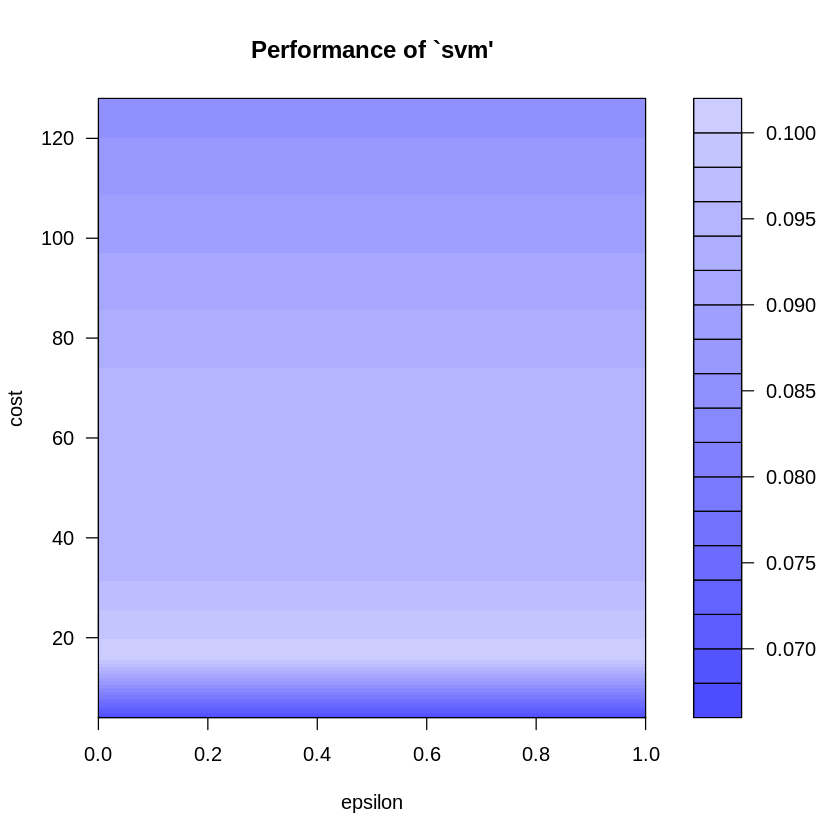

In [52]:
set.seed(123)
tmodel=tune(type = "C-classification", svm, Class~., data=wine,
ranges=list(epsilon= seq(0,1,0.1), cost = 2^(2:7)))
plot(tmodel)

In [53]:
summary(tmodel)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 epsilon cost
       0    4

- best performance: 0.06732026 

- Detailed performance results:
   epsilon cost      error dispersion
1      0.0    4 0.06732026 0.04460116
2      0.1    4 0.06732026 0.04460116
3      0.2    4 0.06732026 0.04460116
4      0.3    4 0.06732026 0.04460116
5      0.4    4 0.06732026 0.04460116
6      0.5    4 0.06732026 0.04460116
7      0.6    4 0.06732026 0.04460116
8      0.7    4 0.06732026 0.04460116
9      0.8    4 0.06732026 0.04460116
10     0.9    4 0.06732026 0.04460116
11     1.0    4 0.06732026 0.04460116
12     0.0    8 0.07875817 0.04724329
13     0.1    8 0.07875817 0.04724329
14     0.2    8 0.07875817 0.04724329
15     0.3    8 0.07875817 0.04724329
16     0.4    8 0.07875817 0.04724329
17     0.5    8 0.07875817 0.04724329
18     0.6    8 0.07875817 0.04724329
19     0.7    8 0.07875817 0.04724329
20     0.8    8 0.07875817 0.04724329
21     0.9    

In [54]:
mymodel=tmodel$best.model 
summary(mymodel)


Call:
best.tune(METHOD = svm, train.x = Class ~ ., data = wine, ranges = list(epsilon = seq(0, 
    1, 0.1), cost = 2^(2:7)), type = "C-classification")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  4 

Number of Support Vectors:  45

 ( 14 19 12 )


Number of Classes:  3 

Levels: 
 Low Middle Premium




In [55]:
mymodel=tmodel$best.model
summary(mymodel)


Call:
best.tune(METHOD = svm, train.x = Class ~ ., data = wine, ranges = list(epsilon = seq(0, 
    1, 0.1), cost = 2^(2:7)), type = "C-classification")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  4 

Number of Support Vectors:  45

 ( 14 19 12 )


Number of Classes:  3 

Levels: 
 Low Middle Premium




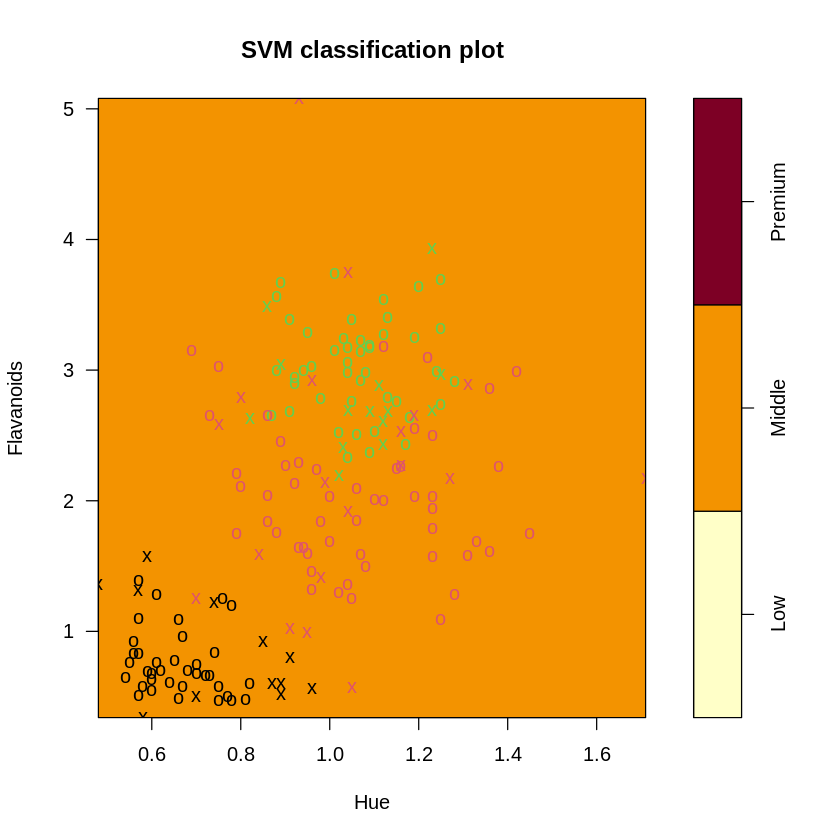

In [56]:
plot(mymodel, data=wine, Flavanoids~Hue, slice = list(OD=2, Proline=4))

In [57]:
pred1 = predict(mymodel,wine)
tab1 = table(Predicted=pred1, Actual = wine$Class)
tab1

         Actual
Predicted Low Middle Premium
  Low      48      1       0
  Middle    0     66       1
  Premium   0      4      58

In [58]:
1-sum(diag(tab1)/sum(tab1))

[1] 0.03370787

In [59]:
sum(diag(tab1)/sum(tab1))

[1] 0.9662921